# CounTX Training Analysis

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
rows = []

with open("log.txt", "r") as file:
    data = file.readlines()


for row_text in data:
    try:
        row = json.loads(row_text)
        rows.append(row)
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", e)

df = pd.DataFrame(rows)


In [3]:
df

,train_lr,train_loss,Current Train MAE,Current Train RMSE,Current Val MAE,Current Val RMSE,epoch
0,3.121585e-07,0.080261,131.469925,281.236811,61.982916,130.130759,0
1,9.371585e-07,0.069311,42.945201,91.993316,61.947109,130.097019,1
2,1.562158e-06,0.068950,35.058781,75.493318,52.481975,109.361217,2
3,2.187158e-06,0.068300,29.656931,62.964857,45.066588,97.517031,3
4,2.812158e-06,0.067588,26.141790,53.489548,37.351560,93.769131,4
...,...,...,...,...,...,...,...
362,1.137697e-06,0.045483,5.191074,10.173144,26.132980,75.592844,362
363,1.122276e-06,0.044134,5.055599,9.987673,25.915935,74.899240,363
364,1.106937e-06,0.045071,4.979600,9.131338,26.536122,76.927284,364
365,1.091680e-06,0.045360,5.051599,9.466378,27.050427,76.752010,365


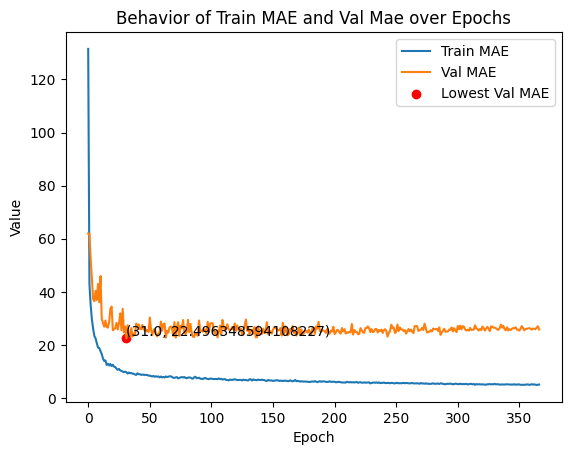

In [4]:
plt.plot(df["epoch"].values, df["Current Train MAE"].values, label="Train MAE")
plt.plot(df["epoch"].values, df["Current Val MAE"].values, label="Val MAE")

plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Behavior of Train MAE and Val Mae over Epochs")

min_val_mae_epoch = df.loc[df["Current Val MAE"].idxmin()]["epoch"]
min_val_mae = df["Current Val MAE"].min()

plt.scatter(min_val_mae_epoch, min_val_mae, color='red', label='Lowest Val MAE')
plt.text(min_val_mae_epoch, min_val_mae, f'({min_val_mae_epoch}, {min_val_mae})', verticalalignment='bottom')



plt.legend()
plt.show()

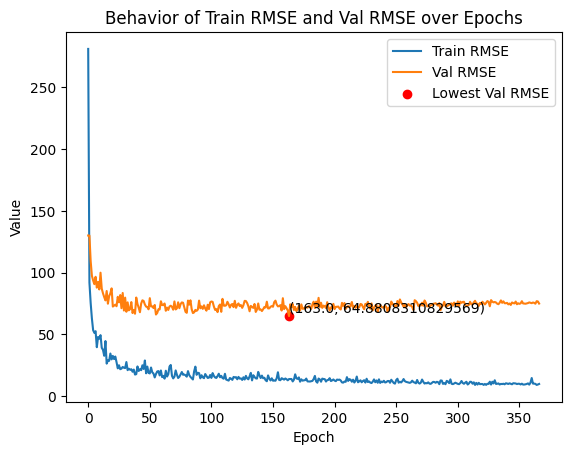

In [5]:
plt.plot(df["epoch"].values, df["Current Train RMSE"].values, label="Train RMSE")
plt.plot(df["epoch"].values, df["Current Val RMSE"].values, label="Val RMSE")

plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Behavior of Train RMSE and Val RMSE over Epochs")

min_val_mae_epoch = df.loc[df["Current Val RMSE"].idxmin()]["epoch"]
min_val_mae = df["Current Val RMSE"].min()

plt.scatter(min_val_mae_epoch, min_val_mae, color='red', label='Lowest Val RMSE')
plt.text(min_val_mae_epoch, min_val_mae, f'({min_val_mae_epoch}, {min_val_mae})', verticalalignment='bottom')

plt.legend()
plt.show()